In [12]:
import matplotlib.pyplot as plt
import numpy as np
from imodels import RuleListClassifier, RuleFit, SLIM, GreedyRuleList
from sklearn.tree import DecisionTreeClassifier, plot_tree

import data
import validate
# sns.set(style="black")
# plt.style.use('dark_background')
outcome_def = 'iai_intervention' # output
%matplotlib inline
%load_ext autoreload
%autoreload 2

df_pecarn, df_psrc, common_feats, filtered_feats_pecarn, filtered_feats_psrc = data.load_it_all(dummy=True)
df = df_pecarn[common_feats].append(df_psrc[common_feats])
processed_feats = data.select_final_feats(common_feats)

train_idxs = data.pecarn_train_idxs
df = df[df.cv_fold.isin(train_idxs)]
print(len(processed_feats), processed_feats)
X, y = df[processed_feats], df[outcome_def]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/accounts/projects/vision/.local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


18 ['AbdDistention_or_AbdomenPain_yes', 'AbdTenderDegree_None', 'AbdTrauma_or_SeatBeltSign_yes', 'Age<2_yes', 'CostalTender_yes', 'DecrBreathSound_yes', 'GCSScore_Full_yes', 'Hypotension_yes', 'LtCostalTender', 'MOI_Bike collision/fall', 'MOI_Fall from an elevation', 'MOI_Motor vehicle collision', 'MOI_Motorcycle/ATV/Scooter collision', 'MOI_Object struck abdomen', 'MOI_Pedestrian/bicyclist struck by moving vehicle', 'RtCostalTender', 'ThoracicTrauma_yes', 'VomitWretch_yes']


In [13]:
processed_feats

['AbdDistention_or_AbdomenPain_yes',
 'AbdTenderDegree_None',
 'AbdTrauma_or_SeatBeltSign_yes',
 'Age<2_yes',
 'CostalTender_yes',
 'DecrBreathSound_yes',
 'GCSScore_Full_yes',
 'Hypotension_yes',
 'LtCostalTender',
 'MOI_Bike collision/fall',
 'MOI_Fall from an elevation',
 'MOI_Motor vehicle collision',
 'MOI_Motorcycle/ATV/Scooter collision',
 'MOI_Object struck abdomen',
 'MOI_Pedestrian/bicyclist struck by moving vehicle',
 'RtCostalTender',
 'ThoracicTrauma_yes',
 'VomitWretch_yes']

In [18]:
bucket_counts = {}
for i in range(1): #X.shape[0]):
    x = X.iloc[i]
    print(x)

AbdDistention_or_AbdomenPain_yes                     0.0
AbdTenderDegree_None                                 1.0
AbdTrauma_or_SeatBeltSign_yes                        0.0
Age<2_yes                                            0.0
CostalTender_yes                                     0.0
DecrBreathSound_yes                                  0.0
GCSScore_Full_yes                                    1.0
Hypotension_yes                                      0.0
LtCostalTender                                       2.0
MOI_Bike collision/fall                              0.0
MOI_Fall from an elevation                           0.0
MOI_Motor vehicle collision                          0.0
MOI_Motorcycle/ATV/Scooter collision                 0.0
MOI_Object struck abdomen                            0.0
MOI_Pedestrian/bicyclist struck by moving vehicle    1.0
RtCostalTender                                       2.0
ThoracicTrauma_yes                                   0.0
VomitWretch_yes                

# fit simple models

**decision tree**

  0%|          | 0/7 [00:00<?, ?it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 7/7 [00:00<00:00, 137.80it/s]


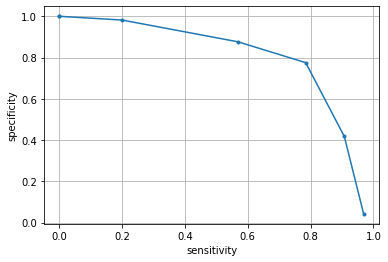

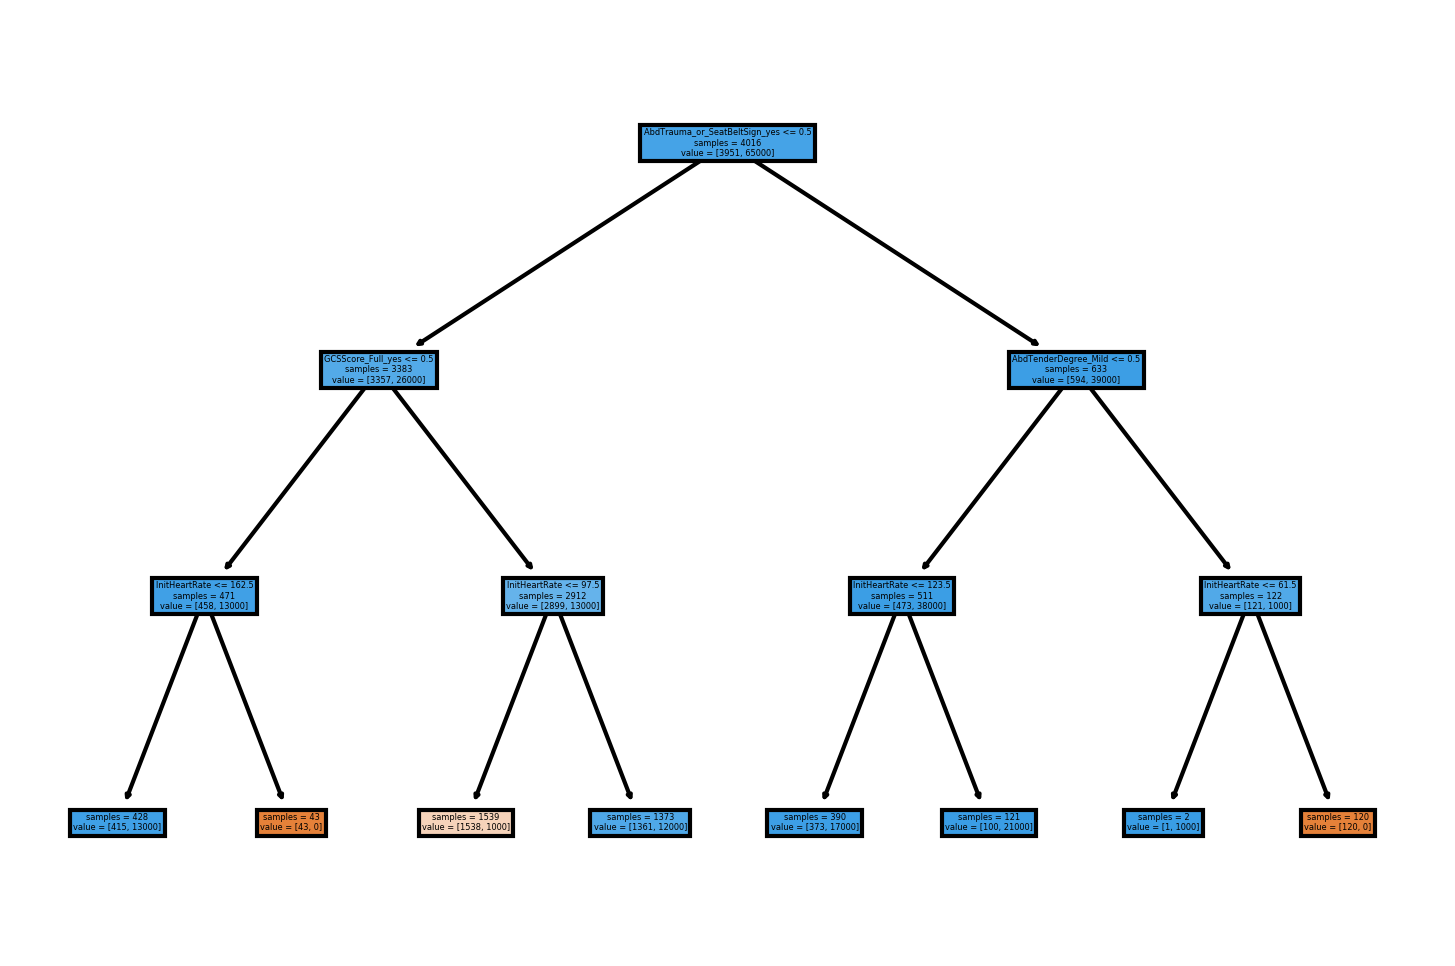

In [5]:
# specify a decision tree with a maximum depth
dt = DecisionTreeClassifier(max_depth=3, class_weight={0:1, 1:1e3})
dt.fit(X_train, y_train)

# calculat mse on the training data
preds = dt.predict(X_test)
preds_proba = dt.predict_proba(X_test)
# print(preds)
sens, spec, threshes = validate.sensitivity_specificity_curve(y_test, preds_proba[:, 1])

# print(f'test: {np.mean(np.square(preds-y_test)):0.2f}')
# print(sklearn.metrics.classification_report(y_test, preds))
plt.figure(dpi=300)
plot_tree(dt, feature_names=processed_feats, impurity=False, filled=True)
# plt.savefig('tree.pdf')
plt.show()